<a href="https://colab.research.google.com/github/AfonsoPaula/Data-Analysis/blob/main/notebook_pandas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading external data & Plotting**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, enconding and other details. The **read_csv** method reads CSV files and accepts many parameters.

In [46]:
df = pd.read_csv('sample_data/btc-market-price.csv')

In [47]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: **timestamp** and **price**. It doesn't have a header, it contains whitespaces and has values separated by commas. Pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the **header** parameter:

In [48]:
df = pd.read_csv('sample_data/btc-market-price.csv', header=None)

In [49]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


We can then set the names of each column explicitely by setting the **df.columns** attribute:

In [50]:
df.columns=['Timestamp', 'Price']

In [51]:
df.shape

(365, 2)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [53]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [54]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


The type of the **Price** column was correctly interpreted as **float**, but the **Timestamp** was interpreted as a regular strign (**object** in pandas notation)

In [55]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

We can performed a vectorized operation to parse all the Timestamp values as **Datetime** objects:

In [56]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [57]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [58]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [59]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

The timestamp looks a lot like the index of this DataFrame: date > price. We can change the autoincremental ID generated by pandas and use the **Timestamp DS** column as the index:

In [60]:
df.set_index('Timestamp', inplace=True)

In [61]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [62]:
df.loc['2017-08-29']

Price    4607.98545
Name: 2017-08-29 00:00:00, dtype: float64

## **Putting everything together**


In [63]:
df = pd.read_csv('sample_data/btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [64]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


The **read_csv** function is extremely powerfull and we can specify many more parameters at important time. We can achive the same results with only one line by doing:

In [65]:
df = pd.read_csv(
    'sample_data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True # Parsing the index with 'True'. If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.
)

In [66]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


## **Plotting basis**

**Pandas** integrates with Matplotlib and creating a plot is as simple as:

<Axes: xlabel='Timestamp'>

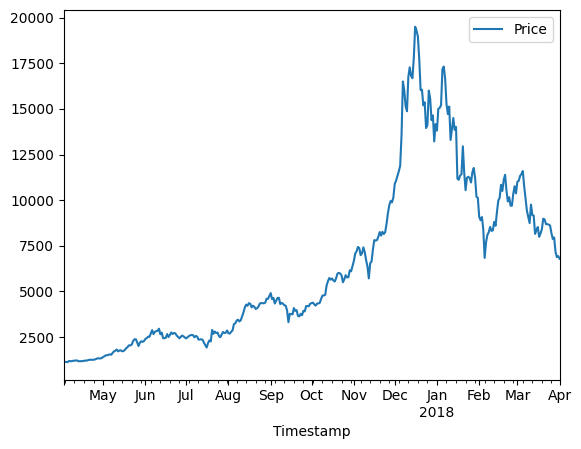

In [67]:
df.plot()

Behind the scenes, it's using **matplotlib.pyplot**'s interface. We can create a similiar plot with **plt.plot()** funtion.

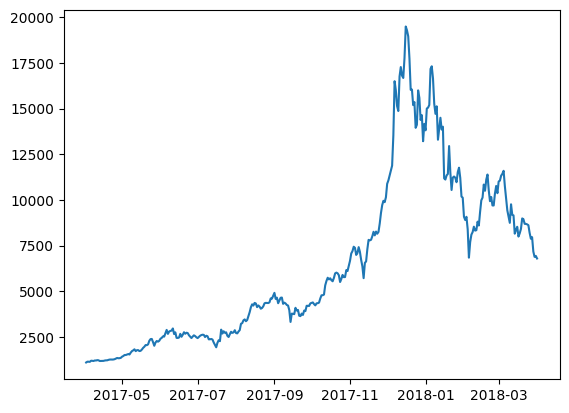

In [68]:
plt.plot(df.index, df['Price'])

**plt.plot()** accepts many parameters, but the first two ones are the most important ones: the values for the **X** and **Y** axes. Another example:

In [69]:
x = np.arange(-10, 11)

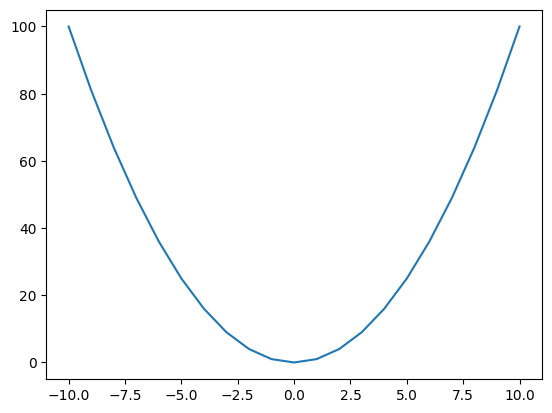

In [70]:
plt.plot(x, x**2)

We're using **matplotlib**'s global API, which is horrible but it's the most popular one.

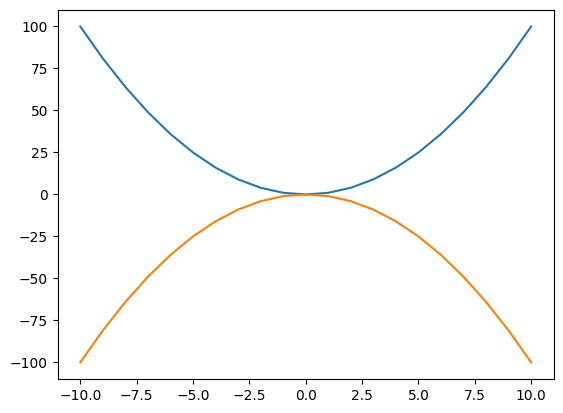

In [71]:
plt.plot(x, x**2)
plt.plot(x, -1 * (x**2))

Each **plt** function alters the global state. If it be need to setsettings of the plot we can use the **plt.figure** function. Other like **plt.title** keep altering the global plot:

Text(0.5, 1.0, 'My Nice Plot')

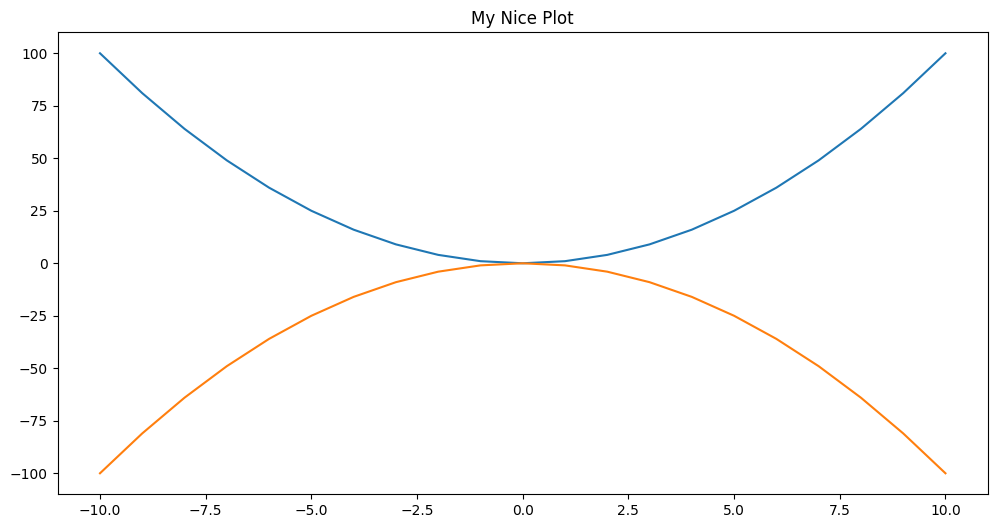

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My Nice Plot')

Some of the arguments in **plt.figure** and **plt.plot** are available in the pandas' **plot** interface:

<Axes: title={'center': 'Bitcoin Price 2017/2018'}, xlabel='Timestamp'>

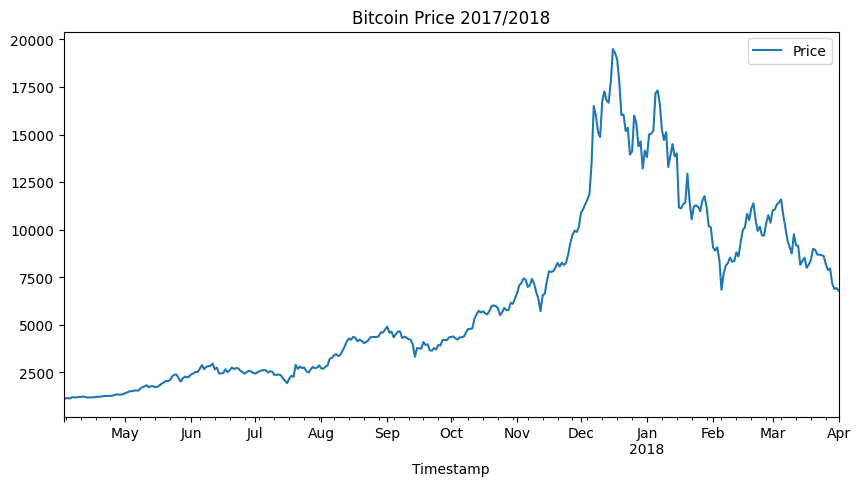

In [73]:
df.plot(figsize=(10, 5), title='Bitcoin Price 2017/2018')

## **A more challenging parsing**

To demonstrate plotting two columns together, we'll try to add Ether prices to our **df** DataFrame. The ETH prices data can be found in the **data/eth-price.csv** file.

In [74]:
eth = pd.read_csv('sample_data/eth-price.csv')

eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


As we can see, it has a **Value** column (which represents the price), a **Date(UTC)** one that has a string representing dates and also a **UnixTimeStamp** date representing the datetime in unix timestamp format. The header is read automatically, let's try to parse dates with the CSV Reader:

In [75]:
eth = pd.read_csv('sample_data/eth-price.csv', parse_dates=True)

print(eth.dtypes)
eth

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23
...,...,...,...
357,3/28/2018,1522195200,445.93
358,3/29/2018,1522281600,383.90
359,3/30/2018,1522368000,393.82
360,3/31/2018,1522454400,394.07


In [76]:
pd.to_datetime(eth['Date(UTC)']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

In [77]:
pd.read_csv('sample_data/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Putting everything together again:

In [78]:
eth = pd.read_csv(
    'sample_data/eth-price.csv',
    parse_dates=True,
    index_col=0
)

print(eth.info())
eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


We can now combine both **DataFrames** into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty **DataFrame** and with the index from Bitcoin prices:

In [79]:
prices = pd.DataFrame(index=df.index)

In [80]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


And now just set columns from the others **DataFrames**:

In [81]:
prices['Bitcoin'] = df['Price']

In [82]:
prices['Ether'] = eth['Value']

In [83]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


We can now try plotting both values:

<Axes: xlabel='Timestamp'>

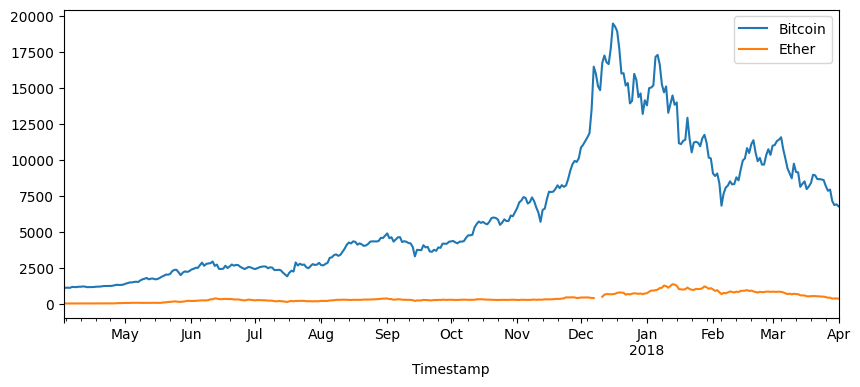

In [84]:
prices.plot(figsize=(10,4))

In [85]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bitcoin  365 non-null    float64
 1   Ether    362 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


Seems like there's a tiny gap between Dec2017 and Jan2018.m

<Axes: xlabel='Timestamp'>

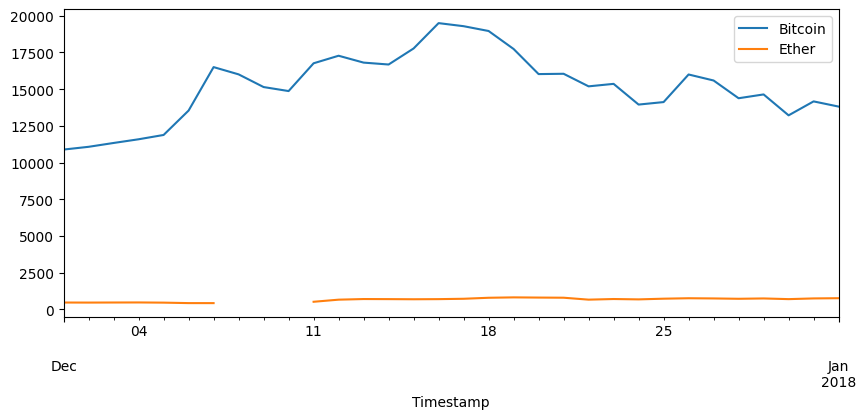

In [86]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(10,4))